# Regioni colorate e trend

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1

from covid_lib import read_covid_data

In [2]:
reg_color={'rosso':["Valle d'Aosta",'Piemonte','Lombardia','Toscana','Abruzzo','Campania','Calabria'],
       'arancio':['Liguria','Friuli Venezia Giulia','Emilia-Romagna','Umbria','Marche','Puglia','Basilicata','Sicilia'],
       'giallo':["P.A. Trento",'Veneto','Sardegna','Lazio','Molise']}

## Lettura dati

In [3]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 278
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-11-27T17:00:00


## Plot per colore di regione

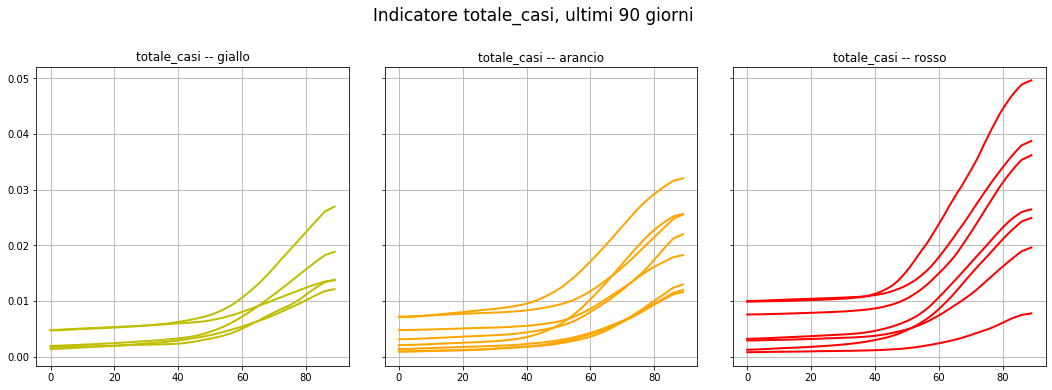

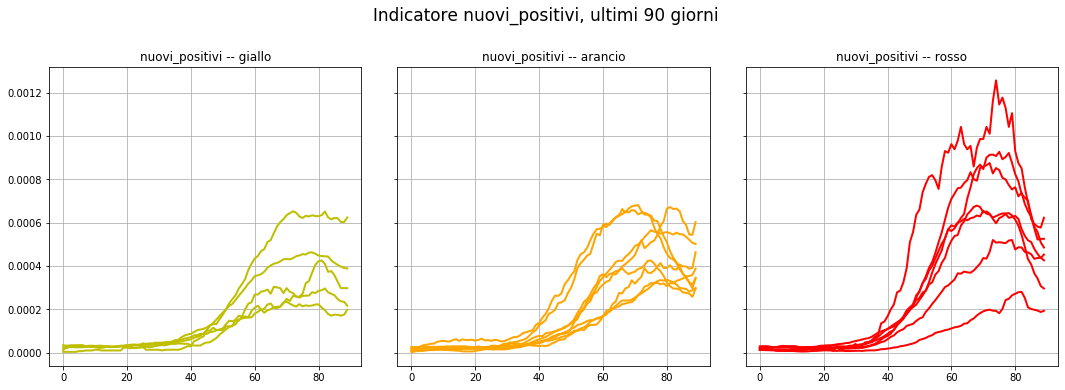

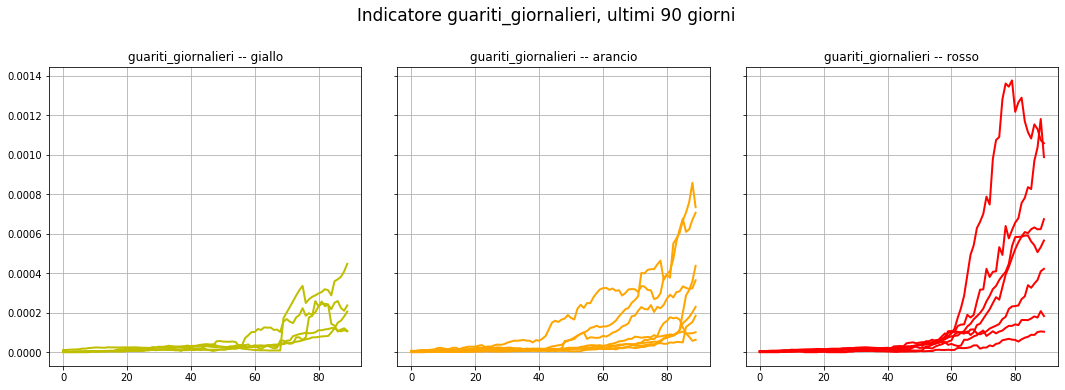

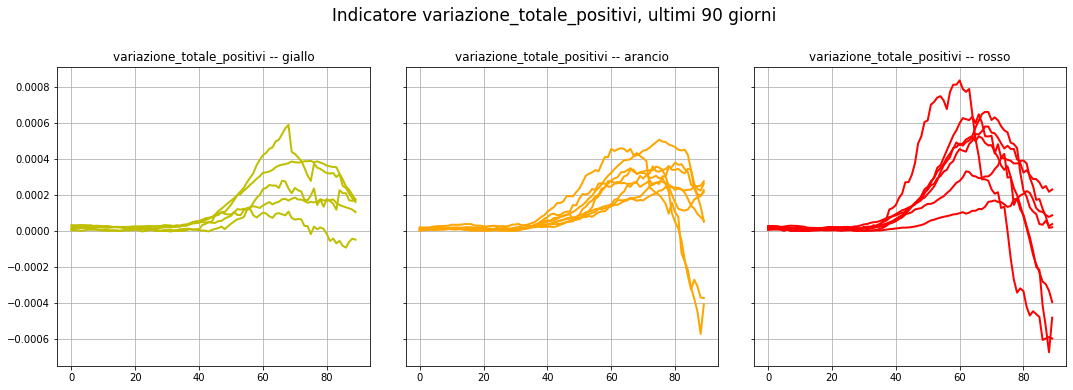

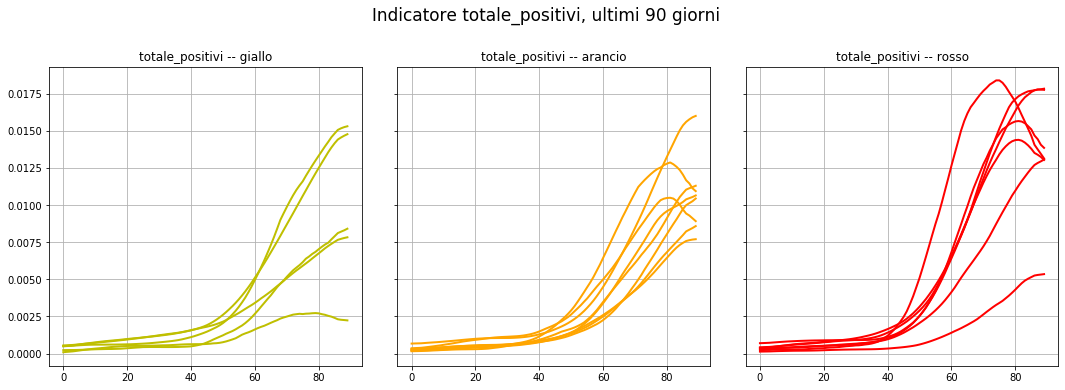

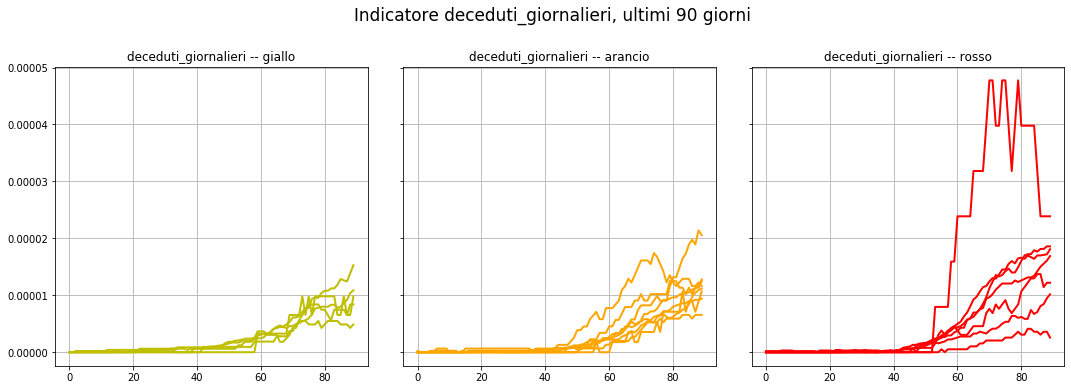

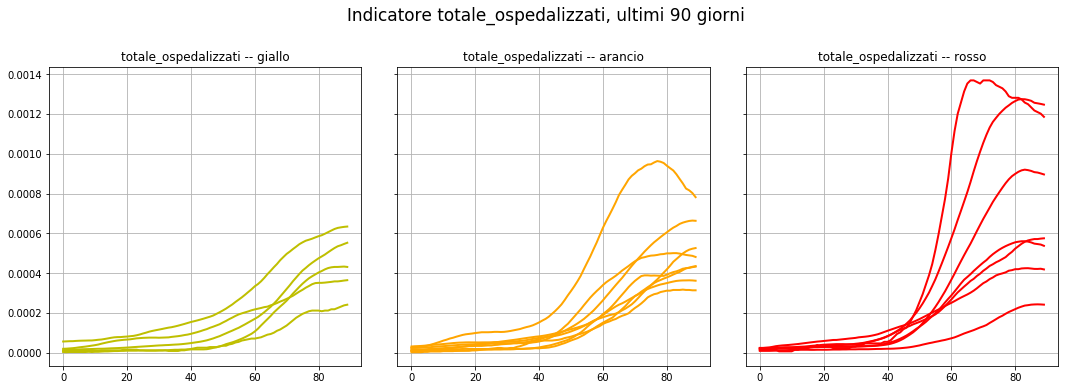

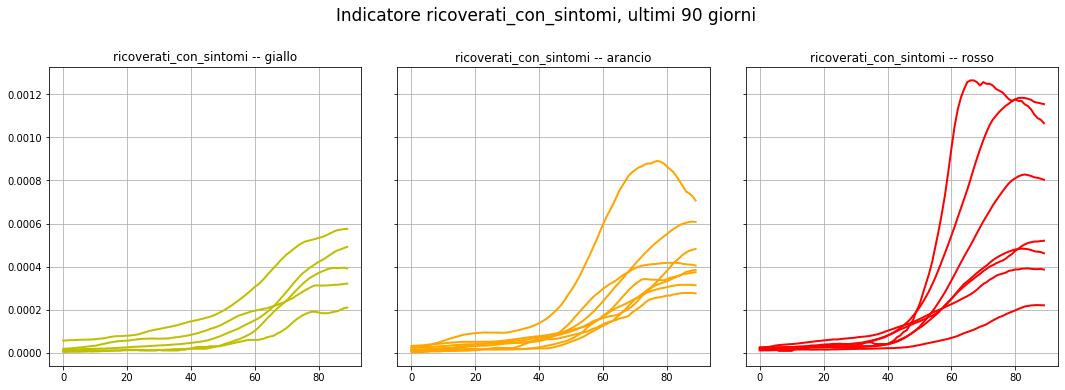

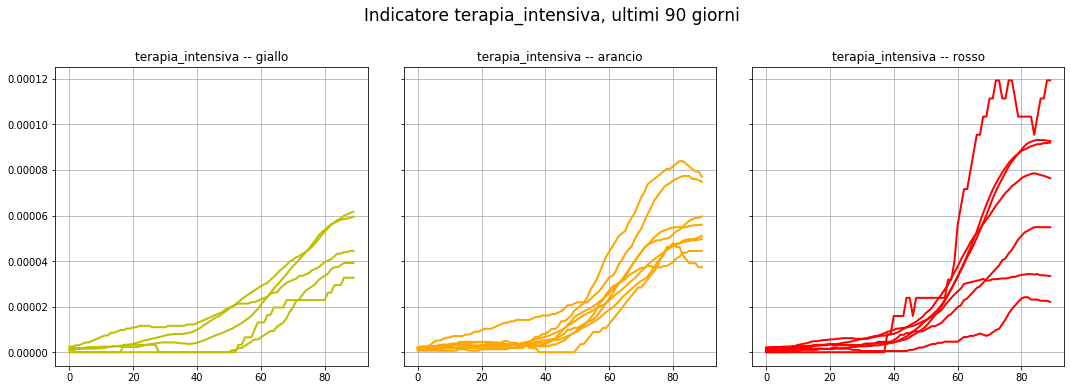

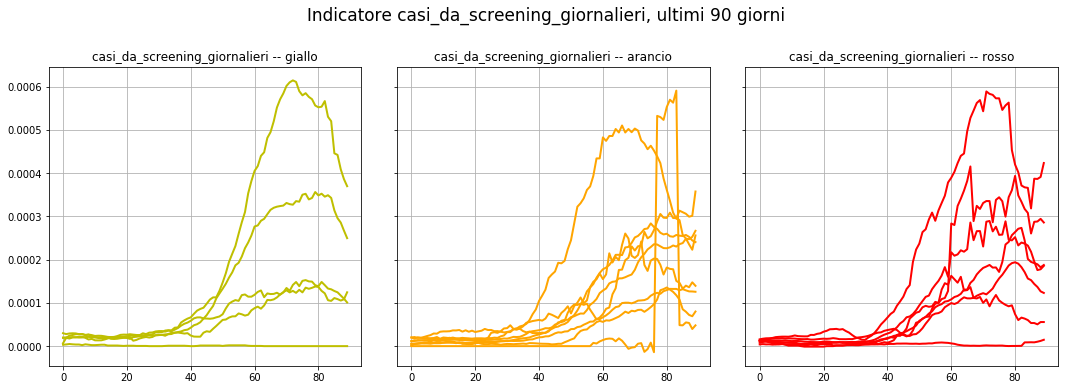

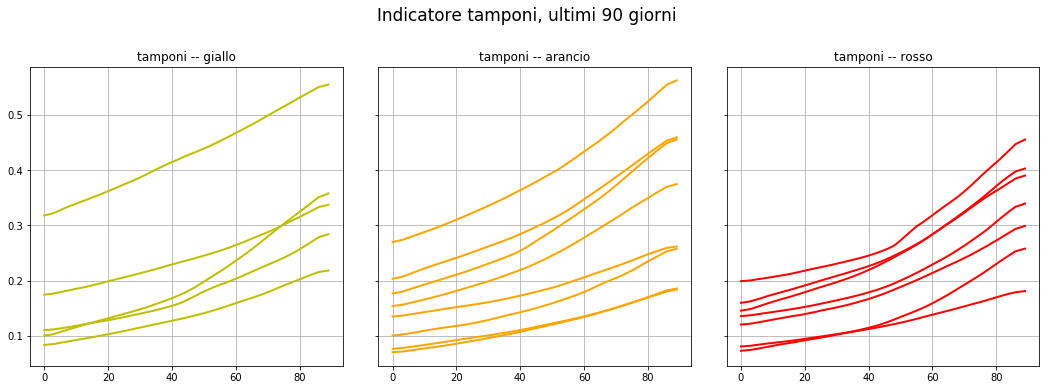

In [5]:

colori=['giallo','arancio','rosso']

indicatori=['totale_casi',
             'nuovi_positivi',
             'guariti_giornalieri',
            'variazione_totale_positivi',
            'totale_positivi',
            'deceduti_giornalieri',
           'totale_ospedalizzati',
            'ricoverati_con_sintomi',
            'terapia_intensiva',
            'casi_da_screening_giornalieri',
           'tamponi']

last_days=90

linecolors={'arancio':'orange','giallo':'y','rosso':'r'}

for indicatore in indicatori:
    fig,ax=plt.subplots(1,3,sharey=True,figsize=(15,5))
    fig.suptitle('Indicatore %s, ultimi %d giorni'%(indicatore,last_days), y=1.1,fontsize=17)
    fig.tight_layout(pad=2.0)

    for i,c in enumerate(colori):
        for regione in reg_color[c]:
            temp_trend=moving_function_rev1(trend[indicatore][regione][-last_days:],np.mean,3,3)/popolazione[regione]

            #ax[i].set_yscale('log')
            ax[i].plot(range(last_days),temp_trend,
                     linecolors[c], linewidth=2)
            ax[i].set_title('%s -- %s'%(indicatore,c))
        ax[i].grid()

    
fig.savefig('PIC_united_colors_%s.JPG'%giorni[-1][0:10])